In [1]:
import pandas as pd
data = pd.read_csv('processed_data.csv')

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [3]:
# Define features and target
features = ['Facility Age', 'Fencing Available Numeric', 'Lighting Available Numeric']
target = 'Facility Condition Numeric'

# Drop rows with missing values
data_cleaned = data.dropna(subset=features + [target])

X = data_cleaned[features]
y = data_cleaned[target]

# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")

Training set shape: (5391, 3), Test set shape: (1348, 3)


In [4]:
# Initialize and train the Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [5]:
# Predict on the test set
y_pred = random_forest.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         3
         1.0       0.20      0.04      0.06        28
         2.0       0.00      0.00      0.00        27
         3.0       0.43      0.07      0.12       165
         4.0       0.84      0.99      0.91      1125

    accuracy                           0.83      1348
   macro avg       0.29      0.22      0.22      1348
weighted avg       0.76      0.83      0.78      1348

Accuracy Score: 0.8323442136498517


/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


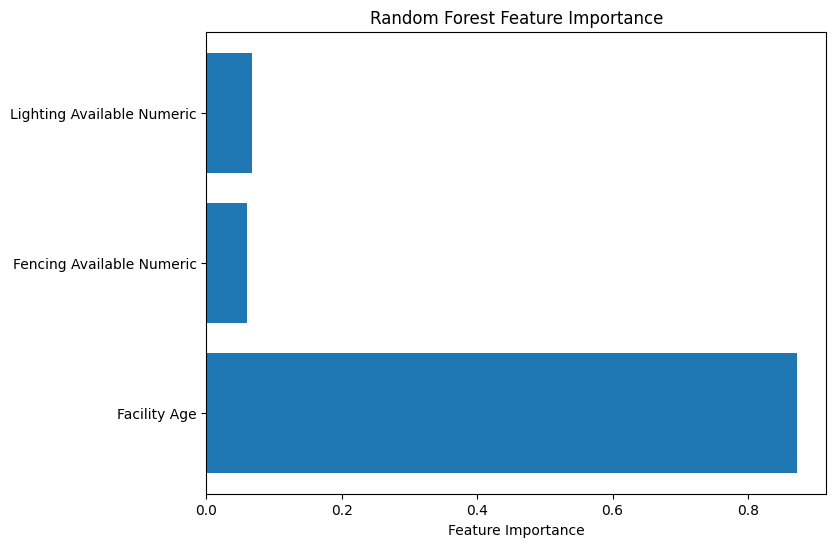

In [6]:
# Display feature importance
import matplotlib.pyplot as plt
import numpy as np

feature_importance = random_forest.feature_importances_
plt.figure(figsize=(8, 6))
plt.barh(np.arange(len(features)), feature_importance, align='center')
plt.yticks(np.arange(len(features)), features)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()